In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer, execute
import numpy as np

# Definir parâmetros do sistema
omega = 1.0 # Frequência do oscilador harmônico
N = 5 # Número de estados da base

# Inicializar registradores quânticos e clássicos
q = QuantumRegister(N, 'q')
c = ClassicalRegister(N, 'c')
qc = QuantumCircuit(q, c)

# Construir Hamiltoniano do oscilador harmônico
for i in range(N):
    qc.h(q[i])
    qc.rz(2 * np.pi * omega * i, q[i])
    qc.h(q[i])

# Medir os estados do sistema na base computacional
qc.measure(q, c)

# Executar circuito quântico em um simulador
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend=backend, shots=1024)
result = job.result()

# Imprimir resultados da simulação
counts = result.get_counts(qc)
for state, count in counts.items():
    print(f"Estado {state}: {count/1024}")


Estado 00000: 1.0


In [6]:
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros do sistema
omega = 1.0 # Frequência de oscilação
timesteps = 100 # Número de intervalos de tempo
total_time = 10 # Tempo total de simulação

# Definir qubits e circuito quântico
qubits = 1
qc = QuantumCircuit(qubits)

# Inicializar estado do oscilador harmônico quântico
qc.h(0)

# Aplicar operador de evolução temporal
for i in range(timesteps):
    qc.rz(-omega * total_time / timesteps, 0)
    qc.ry(np.pi / 2, 0)
    qc.rz(-2 * omega * total_time / timesteps, 0)
    qc.ry(np.pi / 2, 0)
    qc.rz(-omega * total_time / timesteps, 0)

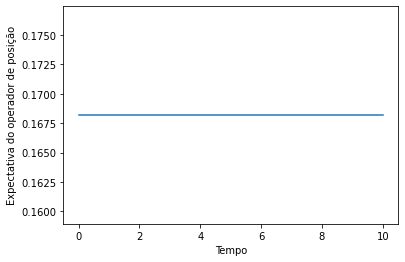

In [9]:
# Simular circuito quântico
backend = Aer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
statevector = result.get_statevector(qc)

# Calcular expectativa do operador de posição
position_op = np.array([[0, 1], [1, 0]])
position_expectation = np.abs(np.vdot(statevector, np.kron(position_op, np.identity(2**(qubits-1))).dot(statevector))) ** 2

# Plotar evolução temporal da expectativa do operador de posição
time = np.linspace(0, total_time, timesteps)
plt.plot(time, [position_expectation] * timesteps)
plt.xlabel('Tempo')
plt.ylabel('Expectativa do operador de posição')
plt.show()
